EX-1: Practice with synthetic data

Use Scikit's make_blobs or make_classification to generate some sample data.

Try to separate them using SVM

In [1]:
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
print(__doc__)

# import some data to play with
X, y = make_classification(
    n_features=20, n_informative=3, n_redundant=0, n_classes=4,
    n_clusters_per_class=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# ANOVA SVM-C
# 1) anova filter, take 3 best ranked features
anova_filter = SelectKBest(f_regression, k=3)
# 2) svm
clf = svm.LinearSVC()

anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X_train, y_train)
y_pred = anova_svm.predict(X_test)
print(classification_report(y_test, y_pred))

coef = anova_svm[:-1].inverse_transform(anova_svm['linearsvc'].coef_)
print(coef)

Automatically created module for IPython interactive environment
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       1.00      0.67      0.80         6
           2       0.83      0.56      0.67         9
           3       0.50      0.67      0.57         6

    accuracy                           0.68        25
   macro avg       0.73      0.72      0.69        25
weighted avg       0.75      0.68      0.69        25

[[ 0.          0.          0.          0.         -0.01572128  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
  -0.35294876 -0.52409892]
 [ 0.          0.          0.          0.          0.16959308  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
  -0.28111303  0.36837514]
 [ 0.          0.          0.          0.         

EX-2: College Admission Data 

In [7]:
import pandas as pd
import numpy as np
admin = pd.read_csv("admission-data.csv")
admin

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,0,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
95,0,660,3.33,2
96,0,640,3.52,4
97,0,480,3.57,2
98,0,700,2.88,2


In [8]:
Y = np.asarray(admin['admit'])
print(y)

[1 0 0 0 0 2 2 1 1 1 2 0 2 2 0 3 3 1 3 2 3 0 1 1 0 0 1 2 2 2 3 0 0 0 1 1 1
 3 3 2 0 2 2 0 1 2 3 0 0 3 3 1 1 3 0 1 1 1 3 2 0 2 2 1 3 0 2 1 3 1 3 1 0 2
 2 0 2 2 3 1 0 3 3 2 0 1 3 1 3 3 3 0 2 1 3 0 2 2 1 3]


In [9]:
X = np.asarray(admin[['gre', 'gpa', 'rank']])
print(X)

[[380.     3.61   3.  ]
 [660.     3.67   3.  ]
 [800.     4.     1.  ]
 [640.     3.19   4.  ]
 [520.     2.93   4.  ]
 [760.     3.     2.  ]
 [560.     2.98   1.  ]
 [400.     3.08   2.  ]
 [540.     3.39   3.  ]
 [700.     3.92   2.  ]
 [800.     4.     4.  ]
 [440.     3.22   1.  ]
 [760.     4.     1.  ]
 [700.     3.08   2.  ]
 [700.     4.     1.  ]
 [480.     3.44   3.  ]
 [780.     3.87   4.  ]
 [360.     2.56   3.  ]
 [800.     3.75   2.  ]
 [540.     3.81   1.  ]
 [500.     3.17   3.  ]
 [660.     3.63   2.  ]
 [600.     2.82   4.  ]
 [680.     3.19   4.  ]
 [760.     3.35   2.  ]
 [800.     3.66   1.  ]
 [620.     3.61   1.  ]
 [520.     3.74   4.  ]
 [780.     3.22   2.  ]
 [520.     3.29   1.  ]
 [540.     3.78   4.  ]
 [760.     3.35   3.  ]
 [600.     3.4    3.  ]
 [800.     4.     3.  ]
 [360.     3.14   1.  ]
 [400.     3.05   2.  ]
 [580.     3.25   1.  ]
 [520.     2.9    3.  ]
 [500.     3.13   2.  ]
 [520.     2.68   3.  ]
 [560.     2.42   2.  ]
 [580.     3.32 

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.asarray(admin[['gre', 'gpa', 'rank']])
Y = np.asarray(admin['admit'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Using Logistic Regression

Score:  0.7878787878787878
Weights:  [[ 0.0114906   1.3637578  -0.30827912]]


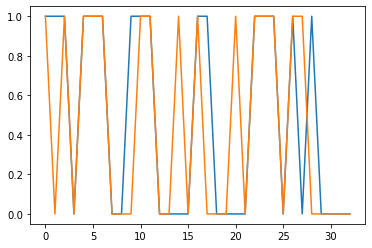

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()
logReg.fit(X_train, y_train)
print('Score: ', logReg.score(X_test, y_test))
print('Weights: ', logReg.coef_)

plt.plot(logReg.predict(X_test))
plt.plot(y_test)
plt.show()

In [12]:
y_pred=logReg.predict(X_test)

In [13]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

Using Support Vector Machine

Score:  0.7878787878787878


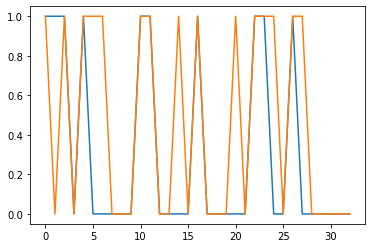

In [19]:
from sklearn import svm


clf = svm.SVC()

clf.fit(X_train, y_train)
print('Score: ', clf.score(X_test, y_test))  # Share the same result as Logistic Regression

plt.plot(clf.predict(X_test))
plt.plot(y_test)
plt.show()

EX-3 - BONUS Lab

In [20]:
import numpy as np
import pandas as pd

In [21]:
adult = pd.read_csv("adult.csv")
adult

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [22]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [23]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [24]:
# Finding how may unique categories we have in this property in this dataset
occupation_set = set(adult['occupation'])
print(occupation_set)

{'Handlers-cleaners', 'Armed-Forces', 'Farming-fishing', 'Prof-specialty', 'Other-service', 'Protective-serv', '?', 'Sales', 'Craft-repair', 'Exec-managerial', 'Machine-op-inspct', 'Adm-clerical', 'Tech-support', 'Transport-moving', 'Priv-house-serv'}


In [25]:
adult['occupation'] = adult['occupation'].map({'?': 0, 'Farming-fishing': 1, 'Tech-support': 2, 
                                                       'Adm-clerical': 3, 'Handlers-cleaners': 4, 'Prof-specialty': 5,
                                                       'Machine-op-inspct': 6, 'Exec-managerial': 7, 
                                                       'Priv-house-serv': 8, 'Craft-repair': 9, 'Sales': 10, 
                                                       'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13, 
                                                       'Protective-serv': 14}).astype(int)

In [26]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,6,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,1,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,14,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,6,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,0,Own-child,White,Female,0,0,30,United-States,<=50K


In [27]:
income_set = set(adult['income'])
print(income_set)

{'>50K', '<=50K'}


In [28]:
adult['income'] = adult['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [29]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,6,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,1,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,14,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,6,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,0,Own-child,White,Female,0,0,30,United-States,0


In [30]:
import matplotlib as plt
%matplotlib inline

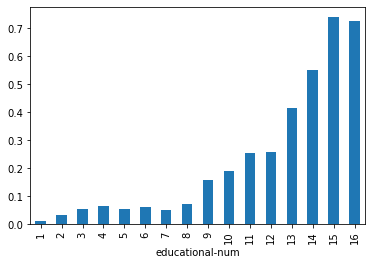

In [43]:
adult.groupby('educational-num').income.mean().plot(kind='bar')

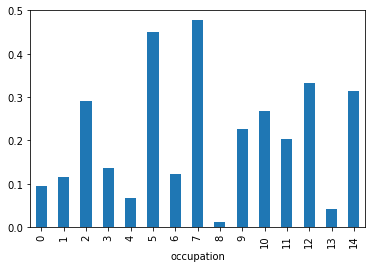

In [32]:
adult.groupby('occupation').income.mean().plot(kind='bar')

In [46]:
from sklearn.model_selection import train_test_split
X = adult[['educational-num', 'occupation']]
Y = adult['income']
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [47]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, Y_train)
score = classifier.score(x_test, y_test)
print(score)

0.7772545808168697
